# Pesquisa: Música na Sala de Aula 
- rock
- hip hop
- mpb
- reggae
- funk
- sertanejo 
- gospel
- eletrônica

# Objetivo: usar a inteligência artificial na sala de aula , gerando músicas nerds com ritmos que os alunos terão uma experiência imersiva na aula.

# Passo 1- entrar no google forms

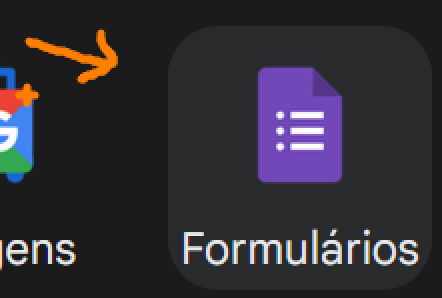

# Passo 2 - gerar o csv

# Passo 3 - importar o csv

In [78]:
import pandas as pd

In [82]:
pesquisa_musical = pd.read_csv('dataset/pesquisamusicall.csv')

In [83]:
type(pesquisa_musical)

pandas.core.frame.DataFrame

In [84]:
pesquisa_musical.head()

,Carimbo de data/hora,Avalie os estilos musicais [rock],Avalie os estilos musicais [hip hop],Avalie os estilos musicais [mpb],Avalie os estilos musicais [reggae],Avalie os estilos musicais [funk],Avalie os estilos musicais [sertanejo],Avalie os estilos musicais [gospel],Avalie os estilos musicais [eletrônica]
0,21/08/2024 10:03:25,3,1,1,1,1,1,1,3
1,21/08/2024 10:04:39,5,3,5,2,1,3,1,5
2,21/08/2024 10:04:52,1,5,1,1,1,1,1,5
3,21/08/2024 10:04:53,1,5,4,4,4,1,1,5
4,21/08/2024 10:04:55,5,4,3,4,1,1,2,5


In [85]:
pesquisa_musical.columns = ['data_hora','rock','hiphop','mpb','reggae','funk','sertanejo','gospel','eletronica']

In [86]:
# Remover a coluna 'data_hora' para realizar o cálculo
df_nota = pesquisa_musical.drop(columns=['data_hora'])

In [87]:
df_nota.head()

,rock,hiphop,mpb,reggae,funk,sertanejo,gospel,eletronica
0,3,1,1,1,1,1,1,3
1,5,3,5,2,1,3,1,5
2,1,5,1,1,1,1,1,5
3,1,5,4,4,4,1,1,5
4,5,4,3,4,1,1,2,5


In [46]:
# Calcular a soma das pontuações para cada estilo musical
soma_pontuacoes = df_nota.sum()

In [47]:
soma_pontuacoes

rock          136
hiphop        119
mpb           127
reggae         88
funk           73
sertanejo      93
gospel        100
eletronica    122
dtype: int64

In [48]:
type(soma_pontuacoes)

pandas.core.series.Series

<Axes: >

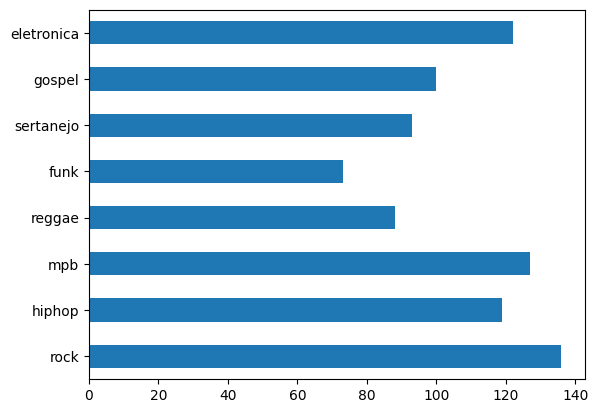

In [88]:
soma_pontuacoes.plot(kind='barh')

# Se preparando para boxplot e histograma

## Explicação
- Criar a Series: A Series é criada com os dados fornecidos.
- Converter para DataFrame: O método .reset_index() transforma a Series em um DataFrame, onde o índice original se torna uma coluna.
- Renomear colunas: As colunas são renomeadas para estilo e pontuacao.

In [50]:
# Converter a Series para um DataFrame
df_estilos = soma_pontuacoes.reset_index()

# Renomear as colunas
df_estilos.columns = ['estilo', 'pontuacao']

# Exibir o DataFrame
print(df_estilos)

       estilo  pontuacao
0        rock        136
1      hiphop        119
2         mpb        127
3      reggae         88
4        funk         73
5   sertanejo         93
6      gospel        100
7  eletronica        122


In [51]:
df_estilos.estilo.count()

np.int64(8)

In [52]:
df_estilos.estilo

0          rock
1        hiphop
2           mpb
3        reggae
4          funk
5     sertanejo
6        gospel
7    eletronica
Name: estilo, dtype: object

In [53]:
df_estilos['pontuacao'].sum()

np.int64(858)

In [54]:
data_grafico = df_estilos.groupby('estilo').sum()['pontuacao'].sort_values(ascending=False)

In [55]:
data_grafico

estilo
rock          136
mpb           127
eletronica    122
hiphop        119
gospel        100
sertanejo      93
reggae         88
funk           73
Name: pontuacao, dtype: int64

In [56]:
dados_grafico = df_estilos.groupby('estilo').sum()['pontuacao'].sort_values()

In [57]:
dados_grafico

estilo
funk           73
reggae         88
sertanejo      93
gospel        100
hiphop        119
eletronica    122
mpb           127
rock          136
Name: pontuacao, dtype: int64

In [58]:
dados_grafico.describe()

count      8.000000
mean     107.250000
std       21.946363
min       73.000000
25%       91.750000
50%      109.500000
75%      123.250000
max      136.000000
Name: pontuacao, dtype: float64

In [59]:
dados_grafico

estilo
funk           73
reggae         88
sertanejo      93
gospel        100
hiphop        119
eletronica    122
mpb           127
rock          136
Name: pontuacao, dtype: int64

<Axes: ylabel='Frequency'>

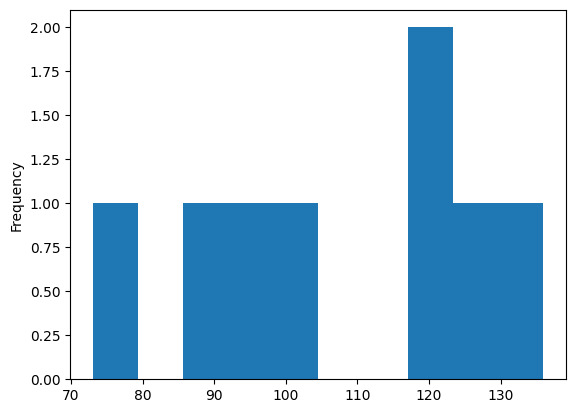

In [60]:
dados_grafico.plot(kind='hist')

# Contagem de notas

In [61]:
notas_contagem = df_nota.apply(pd.Series.value_counts).fillna(0).sum(axis=1).astype(int)
print("Contagem de notas (1 a 5):")
print(notas_contagem.sort_values())
dados_grafico = notas_contagem.sort_values()
dados_grafico

Contagem de notas (1 a 5):
2    34
3    49
4    58
5    64
1    91
dtype: int64


2    34
3    49
4    58
5    64
1    91
dtype: int64

<Axes: ylabel='Frequency'>

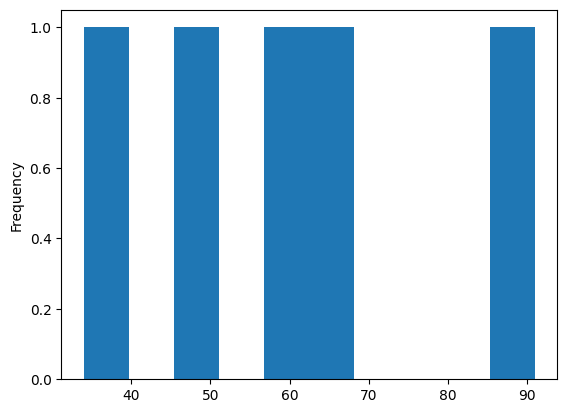

In [62]:
notas_contagem.plot(kind='hist')